# Forecasting sticker sales - EDA

In [40]:
!pip install seaborn

In [41]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


None

In [33]:
train['date'] = pd.to_datetime(train['date'])

In [34]:
train.head()

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0


In [35]:
# Check for missing values
display(train.isnull().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

Less than 4% of target values are null, lets drop them for now then we can use the later

In [36]:
train = train.dropna()

## Visualise the columns

In [37]:
print(f"Unique countries: {train['country'].unique()}")
print(f"Unique stores: {train['store'].unique()}")
print(f"Unique products: {train['product'].unique()}")

Unique countries: ['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
Unique stores: ['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
Unique products: ['Kaggle' 'Kaggle Tiers' 'Kerneler' 'Kerneler Dark Mode'
 'Holographic Goose']


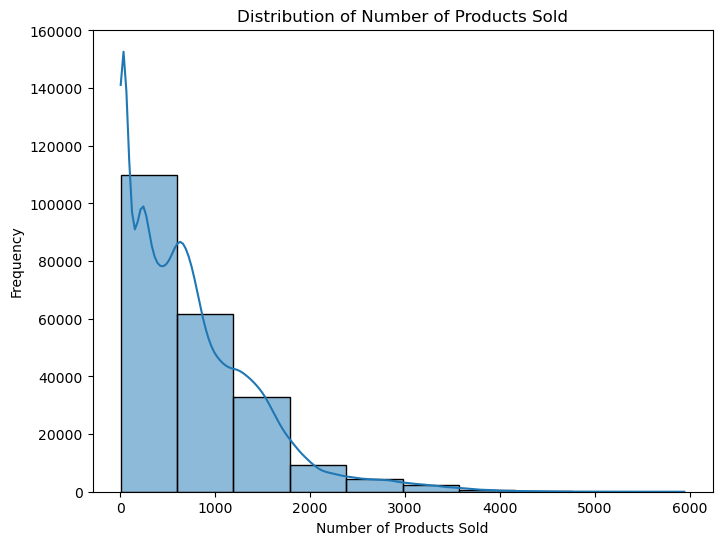

In [42]:
# Distribution of 'num_sold'
plt.figure(figsize=(8, 6))
sns.histplot(train['num_sold'], bins=10, kde=True)
plt.title('Distribution of Number of Products Sold')
plt.xlabel('Number of Products Sold')
plt.ylabel('Frequency')
plt.show()

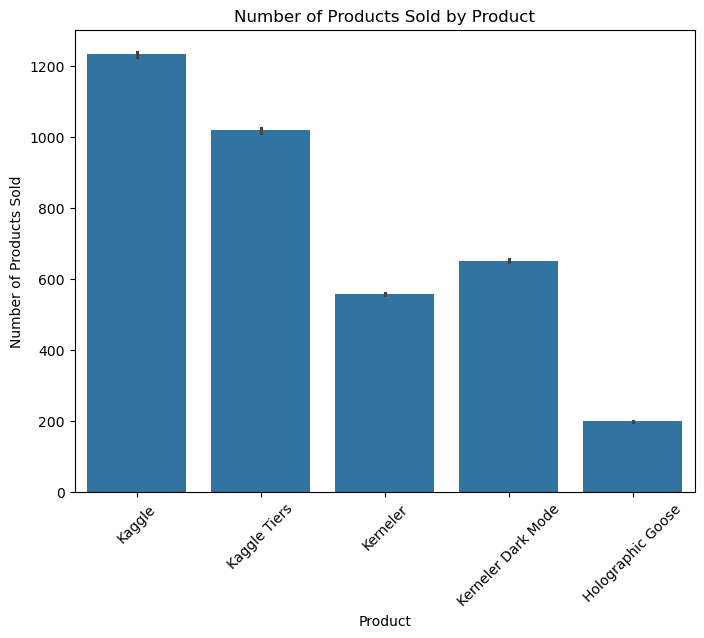

In [44]:
# Sales by Product
plt.figure(figsize=(8, 6))
sns.barplot(x='product', y='num_sold', data=train)
plt.title('Number of Products Sold by Product')
plt.xlabel('Product')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

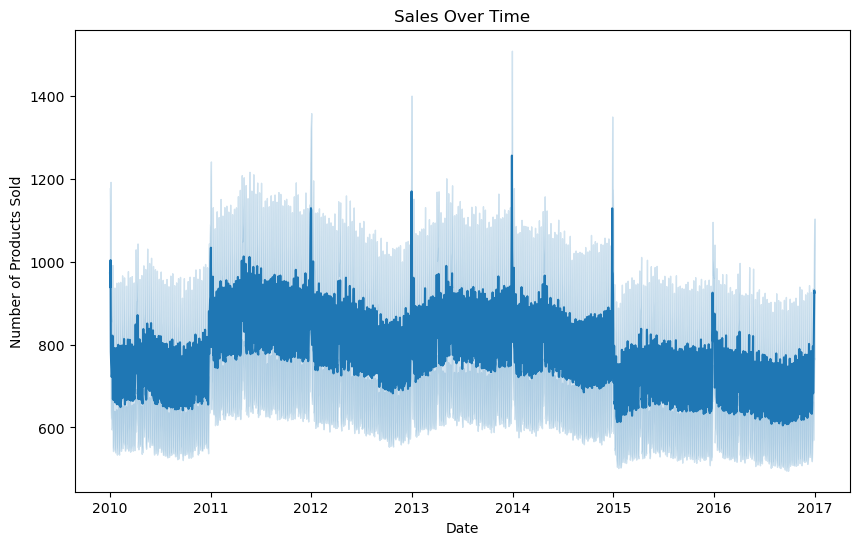

In [45]:
# Sales Over Time (if more dates are available)
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='num_sold', data=train)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()


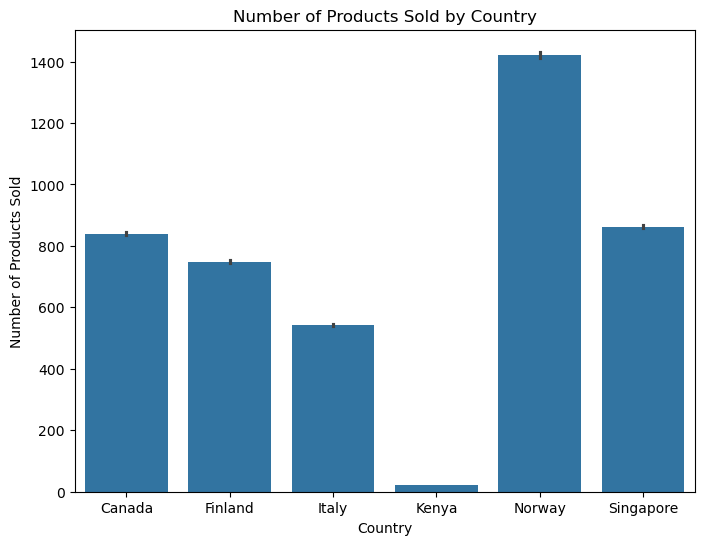

In [46]:
# Sales by Country (if multiple countries are available)
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='num_sold', data=train)
plt.title('Number of Products Sold by Country')
plt.xlabel('Country')
plt.ylabel('Number of Products Sold')
plt.show()